### ROC(Receiver Operating Characteristic) & AUC (Area Under Curve) 

- Used to determine how well a machine learning classifier works
- Can be used to compare two models to select the better one

The dataset we are going to use is the Customer Churn Dataset --> https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

We will build two classifiers a Logistic Regression & a Decision Tree and then compare them using ROC to determine which is the better model

In [541]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

In [542]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('customer_churn_dataset-testing-master.csv')
df = df.dropna()
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## Encoding categorical values

In [543]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df['Subscription Type'] = le.fit_transform(df['Subscription Type'].astype(str))
df['Contract Length'] = le.fit_transform(df['Contract Length'].astype(str))

df_test['Gender'] = le.fit_transform(df_test['Gender'].astype(str))
df_test['Subscription Type'] = le.fit_transform(df_test['Subscription Type'].astype(str))
df_test['Contract Length'] = le.fit_transform(df_test['Contract Length'].astype(str))

df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0


## Since the total spend variable is significantly different in range to other values let's do some scaling

In [544]:
scaler = StandardScaler()
df['Total Spend'] = scaler.fit_transform(np.array(df['Total Spend']).reshape(-1,1))
df_test['Total Spend'] = scaler.fit_transform(np.array(df_test['Total Spend']).reshape(-1,1))

## Dropping the dependent variable and customerID since it has no real value over the prediction

In [545]:
X = df.drop(columns=['Churn', 'CustomerID'], axis=1)
y = df['Churn']

X_test = df_test.drop(columns=['Churn', 'CustomerID'], axis=1)
y_test = df_test['Churn']

In [546]:
ns_probs = [0 for _ in range(len(y_test))]

In [547]:
model = LogisticRegression(solver='newton-cholesky')
model.fit(X,y)

LogisticRegression(solver='newton-cholesky')

In [548]:
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_probs

array([[0.0953869 , 0.9046131 ],
       [0.02063034, 0.97936966],
       [0.32166799, 0.67833201],
       ...,
       [0.00219442, 0.99780558],
       [0.00599988, 0.99400012],
       [0.00163608, 0.99836392]])

In [549]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ValueError: y should be a 1d array, got an array of shape (64374, 2) instead.

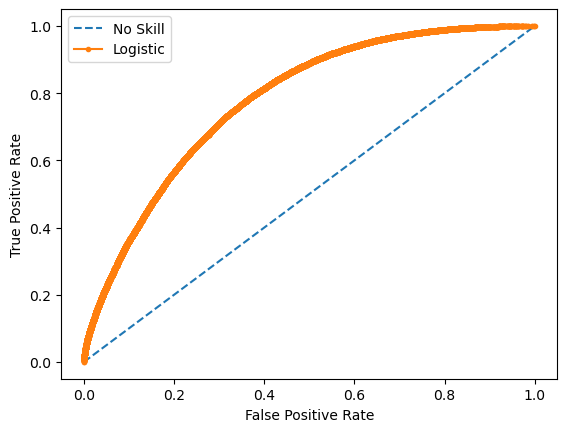

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()